## 2. Machine Learning for Regression Homeworks 2
---

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

1. `import pandas as pd`  
   Ini adalah perintah untuk mengimpor library pandas dan menamainya pd. pandas adalah library Python yang digunakan untuk manipulasi dan analisis data, terutama dengan tabel seperti DataFrame.
2. `import numpy as np`  
   Perintah ini mengimpor library numpy dan menamainya np. numpy digunakan untuk operasi pada array dan fungsi matematika yang efisien dalam Python.
3. `import matplotlib.pyplot as plt`  
   Library matplotlib.pyplot digunakan untuk membuat visualisasi data, seperti grafik. Dengan mengimpor ini sebagai plt, kita bisa membuat berbagai jenis grafik.
4. `import seaborn as sns` 
   seaborn adalah library yang dibangun di atas matplotlib yang menyediakan interface untuk membuat visualisasi statistik yang lebih menarik dan informatif. 
5. `%matplotlib inline` 
   Ini adalah "magic command" yang digunakan di Jupyter Notebook agar semua grafik yang dibuat dengan matplotlib muncul langsung di dalam notebook, tanpa perlu perintah tambahan.


### 2.1 Data Preparation
---

In [114]:
df = pd.read_csv('C:\Dimas\Docs\Me\Coding\Self Learn Bootcamp\Language\Github Data\Repo\DTC-ML-Zoomcamp\Course\II. Machine Learning for Regression Model\Dataset/laptops.csv')
df

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


In [115]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

1. `df.columns`  
   Mengacu pada kolom dalam DataFrame df.
2. `str.lower()`  
   Mengubah semua nama kolom menjadi huruf kecil.
3. `str.replace(' ', '_')`  
   Mengganti semua spasi pada nama kolom dengan underscore (_).
Kode ini digunakan untuk membersihkan nama kolom dalam sebuah DataFrame. Dengan mengubah nama kolom menjadi huruf kecil dan mengganti spasi dengan underscore, nama kolom menjadi lebih seragam dan mudah diakses dalam pemrograman.

In [158]:

columns = ['ram', 'storage', 'screen'] 

1. `columns = ['ram', 'storage', 'screen']`  
   Baris ini membuat sebuah daftar (list) yang berisi tiga elemen: 'ram', 'storage', dan 'screen'. Variabel **columns** menyimpan daftar ini, yang kemungkinan akan digunakan sebagai nama kolom dalam sebuah DataFrame atau struktur data lainnya.

Daftar ini bisa digunakan untuk merepresentasikan atribut-atribut suatu objek, misalnya spesifikasi perangkat seperti RAM, penyimpanan, dan ukuran layar.

In [159]:
df[columns].head()

,ram,storage,screen
0,8,512,15.6
1,8,256,15.6
2,8,256,15.6
3,16,1000,15.6
4,16,512,15.6


1. `df[columns]` 
   Mengakses subset dari DataFrame **df** dengan kolom-kolom yang ditentukan dalam daftar **columns**. Hanya kolom 'ram', 'storage', dan 'screen' yang akan diambil dari DataFrame.

2. `head()`  
   Fungsi **head()** digunakan untuk menampilkan beberapa baris teratas dari DataFrame yang dihasilkan. Secara default, ini akan menampilkan 5 baris pertama.


Kode ini digunakan untuk melihat bagian awal dari DataFrame **df** yang hanya berisi kolom-kolom yang relevan (dalam hal ini, 'ram', 'storage', dan 'screen'). Ini berguna untuk memeriksa data dan memastikan kolom yang diinginkan ada dan sesuai dengan yang diharapkan.

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   laptop        2160 non-null   object 
 1   status        2160 non-null   object 
 2   brand         2160 non-null   object 
 3   model         2160 non-null   object 
 4   cpu           2160 non-null   object 
 5   ram           2160 non-null   int64  
 6   storage       2160 non-null   int64  
 7   storage_type  2118 non-null   object 
 8   gpu           789 non-null    object 
 9   screen        2156 non-null   float64
 10  touch         2160 non-null   object 
 11  final_price   2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 202.6+ KB


## 2.2 EDA
---

In [161]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

laptop
['ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core i5-1235U/8GB/512GB SSD/15.6"'
 'Alurin Go Start Intel Celeron N4020/8GB/256GB SSD/15.6"'
 'ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core i3-1215U/8GB/256GB SSD/15.6"'
 'MSI Katana GF66 12UC-082XES Intel Core i7-12700H/16GB/1TB SSD/RTX3050/15.6"'
 'HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB SSD/15.6"']
2160

status
['New' 'Refurbished']
2

brand
['Asus' 'Alurin' 'MSI' 'HP' 'Lenovo']
27

model
['ExpertBook' 'Go' 'Katana' '15S' 'Crosshair']
121

cpu
['Intel Core i5' 'Intel Celeron' 'Intel Core i3' 'Intel Core i7'
 'AMD Ryzen 5']
28

ram
[ 8 16 32 12  4]
9

storage
[ 512  256 1000   64  128]
12

storage_type
['SSD' 'eMMC' nan]
2

gpu
[nan 'RTX 3050' 'RTX 4060' 'RTX 4050' 'RTX 3060']
44

screen
[15.6 17.3 14.  16.1 13.3]
29

touch
['No' 'Yes']
2

final_price
[1009.    299.    789.   1199.    669.01]
1440



1. `for col in df.columns:`  
   Memulai sebuah loop yang akan iterasi melalui setiap kolom dalam DataFrame `df`. Variabel `col` akan berisi nama kolom saat ini dalam setiap iterasi.
2. `print(col)`  
   Mencetak nama kolom yang sedang diproses.
3. `print(df[col].unique()[:5])`  
   Mencetak 5 nilai unik pertama dari kolom yang sedang diproses. Fungsi `unique()` mengembalikan array nilai unik yang terdapat dalam kolom tersebut.
4. `print(df[col].nunique())`  
   Mencetak jumlah total nilai unik dalam kolom yang sedang diproses. Fungsi `nunique()` mengembalikan jumlah nilai unik yang ada dalam kolom tersebut.
5. `print()`  
   Mencetak baris kosong untuk memisahkan output dari iterasi yang berbeda agar lebih mudah dibaca.

Kode ini digunakan untuk menjelajahi setiap kolom dalam DataFrame `df`. Ini memberikan informasi tentang nama kolom, nilai unik pertama yang ada di kolom tersebut, dan jumlah nilai unik di setiap kolom. Hal ini berguna untuk memahami struktur dan konten data dalam DataFrame.


In [162]:
df.isna().sum()

laptop             0
status             0
brand              0
model              0
cpu                0
ram                0
storage            0
storage_type      42
gpu             1371
screen             4
touch              0
final_price        0
dtype: int64

1. `df.isna()`  
   Fungsi ini mengembalikan DataFrame baru yang berisi nilai boolean. Setiap elemen dalam DataFrame menunjukkan apakah nilai di dalamnya adalah `NaN` (Not a Number) atau tidak. Nilai `True` menunjukkan bahwa elemen tersebut adalah `NaN`, sedangkan `False` menunjukkan bahwa elemen tersebut memiliki nilai yang valid.
2. `sum()`  
   Setelah menggunakan `isna()`, fungsi `sum()` digunakan untuk menjumlahkan nilai `True` di setiap kolom. Karena `True` dianggap sebagai 1 dan `False` sebagai 0, ini akan memberikan jumlah total nilai `NaN` dalam setiap kolom.

Kode ini digunakan untuk menghitung dan menampilkan jumlah nilai `NaN` dalam setiap kolom dari DataFrame `df`. Ini berguna untuk mengevaluasi kualitas data dan mengetahui seberapa banyak data yang hilang dalam setiap kolom, yang bisa mempengaruhi analisis selanjutnya.

> ### Question 1
There's one column with missing values. What is it?

* `'ram'`
* `'storage'`
* `'screen'`
* `'final_price'`

Answer : `'screen'`

In [163]:
df['ram'].median()

16.0

1. `df['ram']`  
   Mengakses kolom `ram` dari DataFrame `df`. Ini memberikan serangkaian nilai yang terdapat di kolom tersebut.
2. `median()`  
   Fungsi ini digunakan untuk menghitung nilai median dari serangkaian nilai. Median adalah nilai tengah dari data yang terurut. Jika jumlah nilai dalam data genap, median dihitung sebagai rata-rata dari dua nilai tengah.

Kode ini digunakan untuk menghitung dan mengembalikan nilai median dari kolom `ram` dalam DataFrame `df`. Ini berguna untuk memahami distribusi data dalam kolom tersebut dan dapat memberikan wawasan tentang spesifikasi RAM perangkat yang dianalisis.

> ### Question 2

What's the median (50% percentile) for variable `'ram'`?

- 8
- 16
- 24
- 32

Answer : `16`

<Axes: xlabel='final_price', ylabel='Count'>

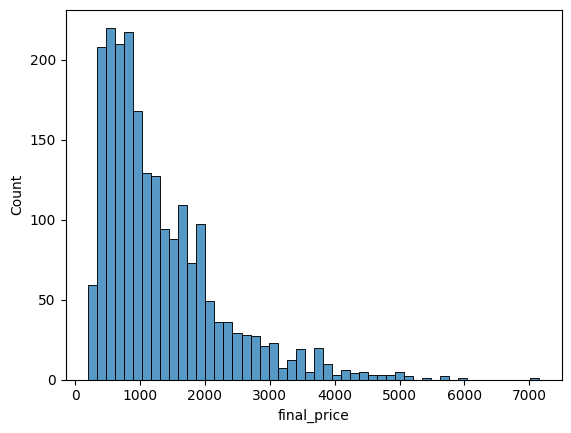

In [164]:
sns.histplot(df.final_price, bins=50)

In [165]:
final_price_logs = np.log1p(df.final_price)

1. `np.log1p(df.final_price)`  
   Fungsi ini menghitung logaritma alami dari kolom `final_price` dalam DataFrame `df` setelah menambahkan 1 pada setiap elemen. Fungsi `log1p(x)` adalah metode yang efisien untuk menghitung `log(1 + x)`, yang berguna ketika `x` memiliki nilai yang sangat kecil atau untuk menghindari masalah logaritma negatif.
2. `final_price_logs =`  
   Hasil dari perhitungan `np.log1p(df.final_price)` disimpan dalam variabel `final_price_logs`. Ini akan menjadi sebuah array atau Series yang berisi nilai logaritma yang dihitung.

Kode ini digunakan untuk menerapkan transformasi logaritma pada kolom `final_price` dalam DataFrame `df`. Transformasi ini sering digunakan untuk mengurangi skewness (kemiringan) dalam data dan membuat distribusi lebih mendekati distribusi normal, yang dapat berguna dalam analisis data dan pemodelan statistik.

<Axes: xlabel='final_price', ylabel='Count'>

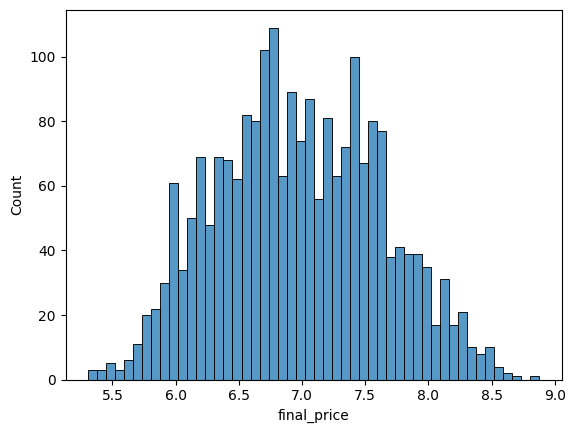

In [166]:
sns.histplot(final_price_logs, bins=50)

## 2.3 Validation framework
---
Prepare and split the dataset

Data Preparation and Splitting

- Shuffle the dataset (use the filtered dataset you’ve created earlier), applying seed `42`.
- Split the dataset into training, validation, and test sets, with a 60%/20%/20% distribution.

Use the code provided in the lessons for reference.

In [167]:
len(df)

2160

1. `len(df)`  
   Fungsi `len()` digunakan untuk menghitung jumlah baris dalam DataFrame `df`. Ini memberikan informasi tentang banyaknya entri atau sampel yang ada dalam DataFrame tersebut.

Kode ini digunakan untuk mengetahui ukuran DataFrame `df` dengan mengembalikan jumlah total baris. Ini berguna untuk mendapatkan gambaran umum tentang jumlah data yang tersedia untuk analisis atau pemodelan.

In [168]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
n

2160

1. `n = len(df)`  
   Fungsi `len()` digunakan untuk menghitung jumlah baris dalam DataFrame `df` dan hasilnya disimpan dalam variabel `n`. Variabel ini sekarang mewakili total jumlah entri dalam DataFrame.
2. `n_val = int(n * 0.2)`  
   Menghitung 20% dari total jumlah entri `n` dan mengonversinya menjadi bilangan bulat dengan menggunakan fungsi `int()`. Hasil ini disimpan dalam variabel `n_val`, yang akan digunakan sebagai ukuran untuk dataset validasi.
3. `n_test = int(n * 0.2)`  
   Sama seperti langkah sebelumnya, ini juga menghitung 20% dari total jumlah entri `n` dan menyimpannya dalam variabel `n_test`. Ini akan digunakan sebagai ukuran untuk dataset pengujian.
4. `n_train = n - n_val - n_test`  
   Menghitung jumlah entri yang tersisa untuk dataset pelatihan dengan mengurangi jumlah entri validasi (`n_val`) dan pengujian (`n_test`) dari total jumlah entri (`n`). Hasil ini disimpan dalam variabel `n_train`.
5. `n`  
   Menampilkan nilai dari variabel `n`, yang merupakan total jumlah entri dalam DataFrame `df`.

Kode ini digunakan untuk membagi dataset menjadi tiga bagian: pelatihan, validasi, dan pengujian. Dengan menggunakan 20% dari total data untuk validasi dan 20% untuk pengujian, sisa data akan digunakan untuk pelatihan. Ini penting dalam pembelajaran mesin untuk memastikan model dapat dievaluasi dengan baik dan tidak overfitting pada data pelatihan.


In [169]:
n_val, n_test, n_train

(432, 432, 1296)

1. `n_val`  
   Variabel ini menyimpan jumlah entri yang digunakan untuk dataset validasi. Dalam kode sebelumnya, `n_val` dihitung sebagai 20% dari total jumlah entri dalam DataFrame `df`.
2. `n_test`  
   Variabel ini menyimpan jumlah entri yang digunakan untuk dataset pengujian. Sama seperti `n_val`, `n_test` juga dihitung sebagai 20% dari total jumlah entri.
3. `n_train`  
   Variabel ini menyimpan jumlah entri yang digunakan untuk dataset pelatihan. Nilai `n_train` dihitung sebagai sisa entri setelah mengurangi jumlah entri validasi (`n_val`) dan pengujian (`n_test`) dari total entri.

Dengan menampilkan `n_val`, `n_test`, dan `n_train`, kode ini memberikan informasi tentang ukuran masing-masing dataset (validasi, pengujian, dan pelatihan) yang digunakan dalam proses pembelajaran mesin. Ini penting untuk memastikan bahwa pembagian data dilakukan secara proporsional dan sesuai dengan kebutuhan analisis model.

In [170]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

1. `idx = np.arange(n)`  
   Membuat array NumPy berisi nilai dari 0 hingga `n-1`, di mana `n` adalah jumlah total entri dalam DataFrame. Variabel `idx` akan berfungsi sebagai indeks untuk mengindeks data secara acak.
2. `np.random.seed(42)`  
   Mengatur seed untuk generator angka acak NumPy ke nilai 42. Ini bertujuan untuk memastikan hasil yang konsisten dan dapat direproduksi setiap kali kode dijalankan. Dengan menggunakan seed yang sama, urutan angka acak yang dihasilkan akan selalu sama.
3. `np.random.shuffle(idx)`  
   Mengacak urutan elemen dalam array `idx` secara in-place. Ini berarti bahwa elemen dalam array `idx` akan diacak, memberikan indeks acak yang dapat digunakan untuk mengakses data dalam DataFrame.

Kode ini digunakan untuk mempersiapkan pengacakan data dengan membuat indeks acak dari entri dalam DataFrame. Dengan mengatur seed, proses pengacakan dapat direproduksi, sehingga hasil analisis atau pemodelan menjadi lebih dapat diandalkan. Indeks yang telah diacak ini biasanya digunakan untuk membagi dataset menjadi subset pelatihan, validasi, dan pengujian.


In [171]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

1. `df_train = df.iloc[idx[:n_train]]`  
   Menggunakan indeks yang telah diacak (`idx`) untuk memilih baris-baris dari DataFrame `df` yang akan digunakan sebagai dataset pelatihan. `idx[:n_train]` mengambil indeks dari awal hingga jumlah entri pelatihan (`n_train`). Hasilnya disimpan dalam variabel `df_train`.
2. `df_val = df.iloc[idx[n_train:n_train+n_val]]`  
   Memilih baris-baris dari DataFrame `df` yang akan digunakan sebagai dataset validasi. `idx[n_train:n_train+n_val]` mengambil indeks mulai dari `n_train` hingga `n_train + n_val`. Hasilnya disimpan dalam variabel `df_val`.
3. `df_test = df.iloc[idx[n_train+n_val:]]`  
   Memilih sisa baris dari DataFrame `df` yang akan digunakan sebagai dataset pengujian. `idx[n_train+n_val:]` mengambil indeks dari `n_train + n_val` hingga akhir array. Hasilnya disimpan dalam variabel `df_test`.

Kode ini digunakan untuk membagi DataFrame `df` menjadi tiga subset: `df_train`, `df_val`, dan `df_test`. Dengan menggunakan indeks acak yang telah dibuat sebelumnya, data dibagi secara acak menjadi dataset pelatihan, validasi, dan pengujian. Ini penting dalam proses pembelajaran mesin untuk memastikan bahwa model dapat dilatih, divalidasi, dan diuji dengan baik.

In [172]:
len(df_train), len(df_val), len(df_test)

(1296, 432, 432)

1. `len(df_train)`  
   Menghitung jumlah baris dalam DataFrame `df_train`, yang merupakan dataset pelatihan. Ini memberikan informasi tentang seberapa banyak data yang digunakan untuk pelatihan model.
2. `len(df_val)`  
   Menghitung jumlah baris dalam DataFrame `df_val`, yang merupakan dataset validasi. Ini memberikan informasi tentang seberapa banyak data yang digunakan untuk menguji model selama proses validasi.
3. `len(df_test)`  
   Menghitung jumlah baris dalam DataFrame `df_test`, yang merupakan dataset pengujian. Ini memberikan informasi tentang seberapa banyak data yang digunakan untuk menguji model setelah pelatihan selesai.

Kode ini digunakan untuk menampilkan ukuran dari masing-masing subset dataset: pelatihan, validasi, dan pengujian. Mengetahui jumlah entri di setiap subset penting untuk memahami bagaimana data dibagi dan memastikan bahwa pembagian tersebut sesuai dengan kebutuhan analisis atau pelatihan model.

In [173]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

1. `df_train = df_train.reset_index(drop=True)`  
   Mengatur ulang indeks DataFrame `df_train` setelah pembagian dataset. Dengan menggunakan `reset_index()`, indeks yang sebelumnya diacak akan dihapus dan digantikan dengan indeks baru yang dimulai dari 0. Argumen `drop=True` memastikan bahwa kolom indeks lama tidak ditambahkan ke DataFrame sebagai kolom baru.
2. `df_val = df_val.reset_index(drop=True)`  
   Sama seperti langkah sebelumnya, ini mengatur ulang indeks DataFrame `df_val`. Indeks baru akan dimulai dari 0, dan kolom indeks lama tidak akan disimpan.
3. `df_test = df_test.reset_index(drop=True)`  
   Mengatur ulang indeks DataFrame `df_test`, juga dengan cara yang sama seperti pada dataset pelatihan dan validasi.

Kode ini digunakan untuk mereset indeks dari masing-masing subset DataFrame (pelatihan, validasi, dan pengujian) setelah pemisahan data. Ini penting untuk memastikan bahwa indeks baru dimulai dari 0 dan terurut, yang dapat memudahkan dalam manipulasi dan akses data selanjutnya. Selain itu, menghindari kolom indeks yang tidak diperlukan dalam DataFrame baru.

In [174]:
y_train = df_train['final_price'].values
y_val = df_val['final_price'].values
y_test = df_test['final_price'].values

1. `y_train = df_train['final_price'].values`  
   Mengambil nilai dari kolom `final_price` dalam DataFrame `df_train` dan menyimpannya dalam variabel `y_train`. Dengan menggunakan `.values`, kita mendapatkan array NumPy yang berisi harga akhir untuk setiap entri dalam dataset pelatihan.
2. `y_val = df_val['final_price'].values`  
   Mengambil nilai dari kolom `final_price` dalam DataFrame `df_val` dan menyimpannya dalam variabel `y_val`. Hasilnya adalah array NumPy yang berisi harga akhir untuk setiap entri dalam dataset validasi.
3. `y_test = df_test['final_price'].values`  
   Mengambil nilai dari kolom `final_price` dalam DataFrame `df_test` dan menyimpannya dalam variabel `y_test`. Ini menghasilkan array NumPy yang berisi harga akhir untuk setiap entri dalam dataset pengujian.

Kode ini digunakan untuk mengekstrak nilai target (dalam hal ini, `final_price`) dari masing-masing subset DataFrame (pelatihan, validasi, dan pengujian) dan menyimpannya sebagai array NumPy. Ini penting untuk persiapan model pembelajaran mesin, di mana kita perlu memisahkan fitur dari label yang ingin diprediksi.

In [175]:
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

1. `del df_train['final_price']`  
   Menghapus kolom `final_price` dari DataFrame `df_train`. Dengan menggunakan `del`, kolom ini tidak akan lagi tersedia dalam DataFrame, sehingga hanya fitur yang tersisa untuk digunakan dalam model pelatihan.
2. `del df_val['final_price']`  
   Menghapus kolom `final_price` dari DataFrame `df_val`. Ini memastikan bahwa dataset validasi hanya berisi fitur tanpa label target.
3. `del df_test['final_price']`  
   Menghapus kolom `final_price` dari DataFrame `df_test`. Dengan cara yang sama, ini memastikan bahwa dataset pengujian hanya berisi fitur tanpa label target.

Kode ini digunakan untuk menghapus kolom `final_price` dari setiap subset DataFrame (pelatihan, validasi, dan pengujian). Hal ini penting karena setelah mengekstrak nilai target ke dalam variabel terpisah (`y_train`, `y_val`, `y_test`), kolom target tidak lagi diperlukan dalam DataFrame fitur, sehingga mencegah kebingungan dan menjaga fokus pada fitur yang akan digunakan dalam model pembelajaran mesin.

## 2.4 Missing Value
---

In [176]:
def prepare_z_X(df):
    df_num = df[columns]
    df_num = df_num.fillna(0)
    X = df_num.to_numpy()
    return X

1. **Definisi Fungsi**  
   `def prepare_z_X(df):`  
   Mendefinisikan fungsi `prepare_z_X` yang menerima satu argumen, yaitu `df`, yang merupakan DataFrame yang berisi data yang akan diproses.
2. **Memilih Kolom Numerik**  
   `df_num = df[columns]`  
   Memilih kolom yang ditentukan dalam daftar `columns` dari DataFrame `df` dan menyimpannya dalam variabel `df_num`. Variabel ini akan berisi hanya kolom-kolom numerik yang diperlukan untuk analisis lebih lanjut.
3. **Mengisi Nilai NaN**  
   `df_num = df_num.fillna(0)`  
   Mengganti semua nilai `NaN` dalam DataFrame `df_num` dengan 0 menggunakan metode `fillna()`. Ini berguna untuk memastikan bahwa tidak ada nilai yang hilang dalam data yang akan digunakan.
4. **Mengonversi ke NumPy Array**  
   `X = df_num.to_numpy()`  
   Mengonversi DataFrame `df_num` menjadi array NumPy dan menyimpannya dalam variabel `X`. Ini penting karena banyak algoritma pembelajaran mesin memerlukan data dalam format array.
5. **Mengembalikan Nilai**  
   `return X`  
   Mengembalikan array NumPy `X` sebagai output dari fungsi. Ini memungkinkan kita untuk menggunakan array ini untuk pemodelan atau analisis lebih lanjut.

Fungsi `prepare_z_X` digunakan untuk mempersiapkan data numerik dari DataFrame dengan memilih kolom yang relevan, mengisi nilai hilang, dan mengonversi data menjadi format yang sesuai untuk analisis atau pemodelan lebih lanjut. Dengan menggunakan fungsi ini, kita memastikan bahwa data yang digunakan bersih dan dalam format yang tepat.

In [177]:
def prepare_m_X(df):
    df_num = df[columns]
    df_num = df_num.fillna(df.screen.mean())
    X = df_num.to_numpy()
    return X

1. `def prepare_m_X(df):`  
   Mendefinisikan fungsi `prepare_m_X` yang menerima satu argumen, yaitu `df`, yang merupakan DataFrame yang berisi data yang akan diproses.
2. `df_num = df[columns]`  
   Memilih kolom yang ditentukan dalam daftar `columns` dari DataFrame `df` dan menyimpannya dalam variabel `df_num`. Variabel ini akan berisi hanya kolom-kolom numerik yang diperlukan untuk analisis lebih lanjut.
3. `df_num = df_num.fillna(df.screen.mean())`  
   Mengganti semua nilai `NaN` dalam DataFrame `df_num` dengan rata-rata dari kolom `screen` menggunakan metode `fillna()`. Ini berguna untuk memastikan bahwa tidak ada nilai yang hilang dalam data yang akan digunakan, dan menggunakan rata-rata dari kolom lain dapat membantu mempertahankan distribusi data.
4. `X = df_num.to_numpy()`  
   Mengonversi DataFrame `df_num` menjadi array NumPy dan menyimpannya dalam variabel `X`. Ini penting karena banyak algoritma pembelajaran mesin memerlukan data dalam format array.
5. `return X`  
   Mengembalikan array NumPy `X` sebagai output dari fungsi. Ini memungkinkan kita untuk menggunakan array ini untuk pemodelan atau analisis lebih lanjut.

Fungsi `prepare_m_X` digunakan untuk mempersiapkan data numerik dari DataFrame dengan memilih kolom yang relevan, mengisi nilai hilang dengan rata-rata dari kolom `screen`, dan mengonversi data menjadi format yang sesuai untuk analisis atau pemodelan lebih lanjut. Dengan menggunakan fungsi ini, kita memastikan bahwa data yang digunakan bersih dan dalam format yang tepat, sambil mempertahankan informasi dari kolom yang ada.

## 2.5 RSME
---

In [178]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

1. `def rmse(y, y_pred):`  
   Mendefinisikan fungsi `rmse` yang menerima dua argumen: `y` dan `y_pred`. `y` adalah array yang berisi nilai sebenarnya (ground truth), sedangkan `y_pred` adalah array yang berisi nilai yang diprediksi oleh model.
2. `error = y_pred - y`  
   Menghitung selisih antara nilai yang diprediksi (`y_pred`) dan nilai sebenarnya (`y`). Hasilnya disimpan dalam variabel `error`, yang mencerminkan kesalahan prediksi untuk setiap data.
3. `mse = (error ** 2).mean()`  
   Menghitung Mean Squared Error (MSE) dengan cara mengkuadratkan setiap elemen dalam `error` dan kemudian menghitung rata-ratanya. Hasil ini memberikan ukuran seberapa besar kesalahan prediksi secara kuadrat.
4. `return np.sqrt(mse)`  
   Mengembalikan nilai Root Mean Squared Error (RMSE) dengan mengambil akar kuadrat dari nilai MSE yang telah dihitung sebelumnya. RMSE memberikan ukuran kesalahan yang lebih mudah dipahami dalam satuan yang sama dengan data asli.

Fungsi `rmse` digunakan untuk menghitung Root Mean Squared Error antara nilai yang diprediksi oleh model dan nilai sebenarnya. RMSE merupakan salah satu metrik evaluasi yang umum digunakan dalam regresi untuk menilai performa model, di mana nilai yang lebih rendah menunjukkan model yang lebih baik.

## 2.6 Linear regression
---

In [179]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T@X
    XTX_inv = np.linalg.inv(XTX)
    w_full = (XTX_inv@X.T).dot(y)
    
    # returning tuple, bias term and weights
    return w_full[0], w_full[1:]

1. `def train_linear_regression(X, y):`  
   Mendefinisikan fungsi `train_linear_regression` yang menerima dua argumen: `X`, yang merupakan array fitur, dan `y`, yang merupakan array target (nilai yang ingin diprediksi).
2. `ones = np.ones(X.shape[0])`  
   Membuat array `ones` yang berisi bilangan 1 sebanyak jumlah baris dalam `X`. Array ini akan digunakan untuk menambahkan bias term ke dalam model regresi linier.
3. `X = np.column_stack([ones, X])`  
   Menggabungkan array `ones` dengan array `X` untuk membuat array fitur baru yang mencakup bias term. Ini penting untuk menghitung koefisien regresi secara tepat.
4. `XTX = X.T@X`  
   Menghitung hasil kali matriks transpose dari `X` dengan `X` itu sendiri. Hasil ini disimpan dalam variabel `XTX`.
5. `XTX_inv = np.linalg.inv(XTX)`  
   Menghitung invers dari matriks `XTX` dan menyimpannya dalam variabel `XTX_inv`. Invers ini akan digunakan untuk menghitung koefisien regresi.
6. `w_full = (XTX_inv@X.T).dot(y)`  
   Menghitung koefisien regresi linier lengkap dengan menggunakan rumus regresi linier, yaitu \( w = (X^TX)^{-1}X^Ty \). Hasil ini disimpan dalam variabel `w_full`.
7. `return w_full[0], w_full[1:]`  
   Mengembalikan dua nilai: bias term (intercept) dan koefisien (weights) untuk fitur. Bias term adalah elemen pertama dari `w_full`, sedangkan sisa elemen merupakan bobot untuk setiap fitur.

Fungsi `train_linear_regression` digunakan untuk melatih model regresi linier menggunakan metode Least Squares. Fungsi ini menghitung koefisien regresi dan bias term berdasarkan data fitur dan target yang diberikan, sehingga model dapat digunakan untuk melakukan prediksi.

## 2.7 Regularize Linear Regression
---

In [180]:
def train_linear_regression_reg(X, y, r=0.001):
    
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T@X
    XTX += r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = (XTX_inv@X.T).dot(y)

    # returning tuple, bias term and weights
    return w_full[0], w_full[1:]

1. `def train_linear_regression_reg(X, y, r=0.001):`  
   Mendefinisikan fungsi `train_linear_regression_reg` yang menerima tiga argumen: `X`, yang merupakan array fitur; `y`, yang merupakan array target (nilai yang ingin diprediksi); dan `r`, yang merupakan parameter regularisasi (defaultnya adalah 0.001).
2. `ones = np.ones(X.shape[0])`  
   Membuat array `ones` yang berisi bilangan 1 sebanyak jumlah baris dalam `X`. Ini digunakan untuk menambahkan bias term ke dalam model regresi linier.
3. `X = np.column_stack([ones, X])`  
   Menggabungkan array `ones` dengan array `X` untuk membuat array fitur baru yang mencakup bias term. Ini penting untuk menghitung koefisien regresi secara tepat.
4. `XTX = X.T@X`  
   Menghitung hasil kali matriks transpose dari `X` dengan `X` itu sendiri. Hasil ini disimpan dalam variabel `XTX`.
5. `XTX += r * np.eye(XTX.shape[0])`  
   Menambahkan `r` dikalikan dengan matriks identitas ke `XTX`. Ini adalah langkah regularisasi yang digunakan untuk mencegah overfitting dengan menambahkan penalti pada koefisien regresi.
6. `XTX_inv = np.linalg.inv(XTX)`  
   Menghitung invers dari matriks `XTX` yang telah diregulasi dan menyimpannya dalam variabel `XTX_inv`. Invers ini akan digunakan untuk menghitung koefisien regresi.
7. `w_full = (XTX_inv@X.T).dot(y)`  
   Menghitung koefisien regresi linier lengkap menggunakan rumus regresi linier dengan regularisasi, yaitu \( w = (X^TX + rI)^{-1}X^Ty \). Hasil ini disimpan dalam variabel `w_full`.
8. `return w_full[0], w_full[1:]`  
   Mengembalikan dua nilai: bias term (intercept) dan koefisien (weights) untuk fitur. Bias term adalah elemen pertama dari `w_full`, sedangkan sisa elemen merupakan bobot untuk setiap fitur.

Fungsi `train_linear_regression_reg` digunakan untuk melatih model regresi linier dengan regularisasi menggunakan metode Least Squares. Fungsi ini menghitung koefisien regresi dan bias term berdasarkan data fitur dan target yang diberikan, serta menambahkan penalti untuk mencegah overfitting, sehingga model dapat digunakan untuk melakukan prediksi dengan lebih baik.

In [181]:
# train dataset
X_train = prepare_z_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# validate dataset
X_val = prepare_z_X(df_val)
y_pred = w0 + X_val.dot(w)

score = rmse(y_val, y_pred)

print('Zeros:')
print(round(score, 2))

# train dataset
X_train = prepare_m_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# validate dataset
X_val = prepare_m_X(df_val)
y_pred = w0 + X_val.dot(w)

score = rmse(y_val, y_pred)

print('Mean:')
print(round(score, 2))

Zeros:
597.36
Mean:
600.26


1. `# train dataset`  
   Komentar yang menunjukkan bahwa bagian kode berikutnya digunakan untuk melatih model menggunakan dataset pelatihan.
2. `X_train = prepare_z_X(df_train)`  
   Memanggil fungsi `prepare_z_X` dengan argumen `df_train` untuk mempersiapkan data fitur dari dataset pelatihan. Hasilnya disimpan dalam variabel `X_train`, yang merupakan array NumPy dari fitur-fitur yang akan digunakan untuk melatih model.
3. `w0, w = train_linear_regression(X_train, y_train)`  
   Memanggil fungsi `train_linear_regression` dengan argumen `X_train` dan `y_train` untuk melatih model regresi linier. Fungsi ini mengembalikan bias term (`w0`) dan koefisien (`w`) untuk fitur-fitur. Nilai-nilai ini disimpan untuk digunakan dalam prediksi selanjutnya.
4. `# validate dataset`  
   Komentar yang menunjukkan bahwa bagian kode berikutnya digunakan untuk memvalidasi model menggunakan dataset validasi.
5. `X_val = prepare_z_X(df_val)`  
   Memanggil fungsi `prepare_z_X` dengan argumen `df_val` untuk mempersiapkan data fitur dari dataset validasi. Hasilnya disimpan dalam variabel `X_val`.
6. `y_pred = w0 + X_val.dot(w)`  
   Menghitung prediksi (`y_pred`) menggunakan bias term (`w0`) dan hasil kali antara data fitur validasi (`X_val`) dengan koefisien (`w`). Ini menghasilkan nilai yang diprediksi untuk dataset validasi.
7. `score = rmse(y_val, y_pred)`  
   Menghitung Root Mean Squared Error (RMSE) antara nilai sebenarnya dari dataset validasi (`y_val`) dan nilai yang diprediksi (`y_pred`) dengan menggunakan fungsi `rmse`. Hasilnya disimpan dalam variabel `score`.
8. `print('Zeros:')`  
   Menampilkan teks 'Zeros:' di konsol sebagai label untuk hasil yang akan ditampilkan berikutnya.
9. `print(round(score, 2))`  
   Mencetak nilai `score` (RMSE) yang telah dibulatkan hingga dua desimal ke konsol. Ini memberikan gambaran tentang seberapa baik model dalam melakukan prediksi pada dataset validasi.

---

1. `# train dataset`  
   Komentar yang menunjukkan bahwa bagian kode berikutnya digunakan untuk melatih model menggunakan dataset pelatihan.
2. `X_train = prepare_m_X(df_train)`  
   Memanggil fungsi `prepare_m_X` dengan argumen `df_train` untuk mempersiapkan data fitur dari dataset pelatihan. Hasilnya disimpan dalam variabel `X_train`, yang merupakan array NumPy dari fitur-fitur yang akan digunakan untuk melatih model. Dalam fungsi ini, nilai yang hilang diisi dengan rata-rata dari kolom `screen`.
3. `w0, w = train_linear_regression(X_train, y_train)`  
   Memanggil fungsi `train_linear_regression` dengan argumen `X_train` dan `y_train` untuk melatih model regresi linier. Fungsi ini mengembalikan bias term (`w0`) dan koefisien (`w`) untuk fitur-fitur. Nilai-nilai ini disimpan untuk digunakan dalam prediksi selanjutnya.
4. `# validate dataset`  
   Komentar yang menunjukkan bahwa bagian kode berikutnya digunakan untuk memvalidasi model menggunakan dataset validasi.
5. `X_val = prepare_m_X(df_val)`  
   Memanggil fungsi `prepare_m_X` dengan argumen `df_val` untuk mempersiapkan data fitur dari dataset validasi. Hasilnya disimpan dalam variabel `X_val`, dengan cara yang sama seperti pada dataset pelatihan, yaitu mengisi nilai yang hilang dengan rata-rata dari kolom `screen`.
6. `y_pred = w0 + X_val.dot(w)`  
   Menghitung prediksi (`y_pred`) menggunakan bias term (`w0`) dan hasil kali antara data fitur validasi (`X_val`) dengan koefisien (`w`). Ini menghasilkan nilai yang diprediksi untuk dataset validasi.
7. `score = rmse(y_val, y_pred)`  
   Menghitung Root Mean Squared Error (RMSE) antara nilai sebenarnya dari dataset validasi (`y_val`) dan nilai yang diprediksi (`y_pred`) dengan menggunakan fungsi `rmse`. Hasilnya disimpan dalam variabel `score`.
8. `print('Mean:')`  
   Menampilkan teks 'Mean:' di konsol sebagai label untuk hasil yang akan ditampilkan berikutnya.
9. `print(round(score, 2))`  
   Mencetak nilai `score` (RMSE) yang telah dibulatkan hingga dua desimal ke konsol. Ini memberikan gambaran tentang seberapa baik model dalam melakukan prediksi pada dataset validasi.

Kode ini melatih model regresi linier dengan menggunakan dataset pelatihan dan kemudian memvalidasi model tersebut dengan dataset validasi. Dengan menghitung RMSE dari prediksi pada dataset validasi, kita dapat mengevaluasi performa model dan mengetahui seberapa baik model dalam memprediksi nilai yang benar. Pada bagian kedua, pengisian nilai yang hilang dilakukan dengan rata-rata pada kolom `screen`.


> ### Question 3

Which method provides the better RMSE?

- Fill with 0
- Fill with mean
- Both options are equally effective

Answer : `597.36`

In [182]:
r = [0, 0.01, 0.1, 1, 5, 10, 100]

for i in r:
    # train dataset
    X_train = prepare_z_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, i)
    
    # validate dataset
    X_val = prepare_z_X(df_val)
    y_pred = w0 + X_val.dot(w)
    
    score = rmse(y_val, y_pred)
    
    print(i)
    print(round(score, 2))

0
597.36
0.01
597.36
0.1
597.35
1
597.21
5
597.01
10
597.06
100
597.9


1. `r = [0, 0.01, 0.1, 1, 5, 10, 100]`  
   Mendefinisikan daftar `r` yang berisi nilai regularisasi yang akan digunakan dalam pelatihan model regresi linier. Nilai-nilai ini akan dieksplorasi untuk mengetahui dampaknya terhadap performa model.
2. `for i in r:`  
   Memulai loop untuk setiap nilai `i` dalam daftar `r`. Di dalam loop ini, model akan dilatih dan divalidasi menggunakan nilai regularisasi yang berbeda.
3. `# train dataset`  
   Komentar yang menunjukkan bahwa bagian kode berikutnya digunakan untuk melatih model menggunakan dataset pelatihan.
4. `X_train = prepare_z_X(df_train)`  
   Memanggil fungsi `prepare_z_X` dengan argumen `df_train` untuk mempersiapkan data fitur dari dataset pelatihan. Hasilnya disimpan dalam variabel `X_train`, yang merupakan array NumPy dari fitur-fitur yang akan digunakan untuk melatih model.
5. `w0, w = train_linear_regression_reg(X_train, y_train, i)`  
   Memanggil fungsi `train_linear_regression_reg` dengan argumen `X_train`, `y_train`, dan nilai regularisasi `i` untuk melatih model regresi linier dengan regularisasi. Fungsi ini mengembalikan bias term (`w0`) dan koefisien (`w`) untuk fitur-fitur. Nilai-nilai ini disimpan untuk digunakan dalam prediksi selanjutnya.
6. `# validate dataset`  
   Komentar yang menunjukkan bahwa bagian kode berikutnya digunakan untuk memvalidasi model menggunakan dataset validasi.
7. `X_val = prepare_z_X(df_val)`  
   Memanggil fungsi `prepare_z_X` dengan argumen `df_val` untuk mempersiapkan data fitur dari dataset validasi. Hasilnya disimpan dalam variabel `X_val`.
8. `y_pred = w0 + X_val.dot(w)`  
   Menghitung prediksi (`y_pred`) menggunakan bias term (`w0`) dan hasil kali antara data fitur validasi (`X_val`) dengan koefisien (`w`). Ini menghasilkan nilai yang diprediksi untuk dataset validasi.
9. `score = rmse(y_val, y_pred)`  
   Menghitung Root Mean Squared Error (RMSE) antara nilai sebenarnya dari dataset validasi (`y_val`) dan nilai yang diprediksi (`y_pred`) dengan menggunakan fungsi `rmse`. Hasilnya disimpan dalam variabel `score`.
10. `print(i)`  
    Mencetak nilai regularisasi saat ini (`i`) ke konsol untuk menunjukkan nilai yang sedang digunakan.
11. `print(round(score, 2))`  
    Mencetak nilai `score` (RMSE) yang telah dibulatkan hingga dua desimal ke konsol. Ini memberikan gambaran tentang seberapa baik model dalam melakukan prediksi pada dataset validasi dengan nilai regularisasi tersebut.

Kode ini melakukan pelatihan dan validasi model regresi linier dengan menerapkan variasi nilai regularisasi. Dengan menggunakan RMSE dari prediksi pada dataset validasi, kita dapat mengevaluasi pengaruh setiap nilai regularisasi terhadap performa model, sehingga membantu dalam memilih nilai regularisasi yang optimal.


> ### Question 4

Which `r` value gives the best RMSE? If multiple values result in similar RMSE, select the smallest `r`.

- 0
- 0.01
- 1
- 10
- 100

Answer : `10`

## 2.8 Standard Deviation of multiple scores based on different seeds
---

In [183]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

results = []

for seed in seeds:

    np.random.seed(seed)
    idx = np.arange(n)
    np.random.shuffle(idx)
    
    df_train = df.iloc[idx[ : n_train]]
    df_val = df.iloc[idx[n_train : n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val : ]]

    y_train = df_train['final_price'].values
    y_val = df_val['final_price'].values
    y_test = df_test['final_price'].values
    
    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']

    # train dataset
    X_train = prepare_z_X(df_train)
    w0, w = train_linear_regression(X_train, y_train)
    
    # validate dataset
    X_val = prepare_z_X(df_val)
    y_pred = w0 + X_val.dot(w)
    
    score = rmse(y_val, y_pred)

    results = np.append(results, score)

std = np.std(results)

round(std, 3)

29.176

1. `seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`  
   Mendefinisikan daftar `seeds` yang berisi nilai-nilai benih (seed) yang akan digunakan untuk memastikan reproduktifitas hasil randomisasi data.
2. `results = []`  
   Menginisialisasi list kosong `results` untuk menyimpan hasil RMSE dari setiap iterasi pelatihan dan validasi model.
3. `for seed in seeds:`  
   Memulai loop untuk setiap nilai `seed` dalam daftar `seeds`. Di dalam loop ini, dataset akan diacak dan model akan dilatih dan divalidasi.
4. `np.random.seed(seed)`  
   Mengatur seed untuk generator angka acak NumPy sesuai dengan nilai `seed` saat ini, sehingga hasil randomisasi dapat direproduksi.
5. `idx = np.arange(n)`  
   Membuat array `idx` yang berisi indeks dari 0 hingga `n` (total jumlah data).
6. `np.random.shuffle(idx)`  
   Mengacak urutan elemen dalam array `idx` untuk membuat pembagian acak dari dataset.
7. `df_train = df.iloc[idx[ : n_train]]`  
   Memilih subset dari DataFrame `df` untuk dataset pelatihan (`df_train`) menggunakan indeks yang sudah diacak.
8. `df_val = df.iloc[idx[n_train : n_train+n_val]]`  
   Memilih subset dari DataFrame `df` untuk dataset validasi (`df_val`) berdasarkan indeks yang sudah diacak.
9. `df_test = df.iloc[idx[n_train+n_val : ]]`  
   Memilih subset dari DataFrame `df` untuk dataset pengujian (`df_test`) berdasarkan indeks yang sudah diacak.
10. `y_train = df_train['final_price'].values`  
    Mengambil nilai `final_price` dari dataset pelatihan dan menyimpannya dalam array `y_train`.
11. `y_val = df_val['final_price'].values`  
    Mengambil nilai `final_price` dari dataset validasi dan menyimpannya dalam array `y_val`.
12. `y_test = df_test['final_price'].values`  
    Mengambil nilai `final_price` dari dataset pengujian dan menyimpannya dalam array `y_test`.
13. `del df_train['final_price']`  
    Menghapus kolom `final_price` dari dataset pelatihan untuk hanya menyisakan fitur-fitur yang diperlukan.
14. `del df_val['final_price']`  
    Menghapus kolom `final_price` dari dataset validasi untuk hanya menyisakan fitur-fitur yang diperlukan.
15. `del df_test['final_price']`  
    Menghapus kolom `final_price` dari dataset pengujian untuk hanya menyisakan fitur-fitur yang diperlukan.
16. `# train dataset`  
    Komentar yang menunjukkan bahwa bagian kode berikutnya digunakan untuk melatih model menggunakan dataset pelatihan.
17. `X_train = prepare_z_X(df_train)`  
    Memanggil fungsi `prepare_z_X` dengan argumen `df_train` untuk mempersiapkan data fitur dari dataset pelatihan. Hasilnya disimpan dalam variabel `X_train`.
18. `w0, w = train_linear_regression(X_train, y_train)`  
    Memanggil fungsi `train_linear_regression` dengan argumen `X_train` dan `y_train` untuk melatih model regresi linier. Fungsi ini mengembalikan bias term (`w0`) dan koefisien (`w`).
19. `# validate dataset`  
    Komentar yang menunjukkan bahwa bagian kode berikutnya digunakan untuk memvalidasi model menggunakan dataset validasi.
20. `X_val = prepare_z_X(df_val)`  
    Memanggil fungsi `prepare_z_X` dengan argumen `df_val` untuk mempersiapkan data fitur dari dataset validasi. Hasilnya disimpan dalam variabel `X_val`.
21. `y_pred = w0 + X_val.dot(w)`  
    Menghitung prediksi (`y_pred`) menggunakan bias term (`w0`) dan hasil kali antara data fitur validasi (`X_val`) dengan koefisien (`w`).
22. `score = rmse(y_val, y_pred)`  
    Menghitung Root Mean Squared Error (RMSE) antara nilai sebenarnya dari dataset validasi (`y_val`) dan nilai yang diprediksi (`y_pred`) dengan menggunakan fungsi `rmse`. Hasilnya disimpan dalam variabel `score`.
23. `results = np.append(results, score)`  
    Menambahkan nilai `score` (RMSE) ke dalam list `results` untuk mencatat hasil dari iterasi saat ini.
24. `std = np.std(results)`  
    Menghitung deviasi standar dari hasil RMSE yang disimpan dalam `results`. Ini memberikan informasi tentang variabilitas performa model di antara berbagai pembagian data.
25. `round(std, 3)`  
    Mengembalikan nilai deviasi standar yang telah dibulatkan hingga tiga desimal. Ini memberikan ringkasan dari konsistensi model di berbagai iterasi dengan seed yang berbeda.

Kode ini membagi dataset menjadi subset pelatihan, validasi, dan pengujian dengan cara yang acak berdasarkan beberapa nilai seed. Model regresi linier dilatih dan divalidasi pada setiap pembagian data, dan deviasi standar dari RMSE dihitung untuk mengevaluasi stabilitas performa model di berbagai pembagian data yang berbeda. 

> ### Question 5

What is the standard deviation of the RMSE values?

- 19.176
- 29.176
- 39.176
- 49.176

Answer : `29.176`

In [184]:
np.random.seed(9)
idx = np.arange(n)
np.random.shuffle(idx)

df_train = df.iloc[idx[ : n_train]]
df_val = df.iloc[idx[n_train : n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val : ]]

y_train = df_train['final_price'].values
y_val = df_val['final_price'].values
y_test = df_test['final_price'].values

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

df_full_train = pd.concat([df_train, df_val])

df_full_train = df_full_train.reset_index(drop=True)

X_full_train = prepare_z_X(df_full_train)

y_full_train = np.concatenate([y_train, y_val])

# test dataset
X_test = prepare_z_X(df_test)
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

y_pred = w0 + X_test.dot(w)

score = rmse(y_test, y_pred)

round(score,2)

608.61

1. `np.random.seed(9)`  
   Mengatur seed untuk generator angka acak NumPy dengan nilai 9. Ini memastikan bahwa setiap kali kode ini dijalankan, hasil pengacakan akan selalu sama. Ini penting untuk reproduktifitas, terutama saat melakukan eksperimen atau pelatihan model, karena kita ingin dapat mengulangi hasil yang sama jika diperlukan.
2. `idx = np.arange(n)`  
   Membuat array `idx` yang berisi urutan angka dari 0 hingga `n-1`. Fungsi `np.arange(n)` menghasilkan array dengan nilai yang dimulai dari 0 hingga `n` (total jumlah data) secara berurutan. Misalnya, jika `n` adalah 5, maka `idx` akan menjadi `[0, 1, 2, 3, 4]`.
3. `np.random.shuffle(idx)`  
   Mengacak urutan elemen dalam array `idx` secara in-place. Ini mengubah urutan elemen di dalam `idx`, sehingga setiap kali kode dijalankan, urutan ini akan berbeda (tetapi tetap sama jika menggunakan seed yang sama). Hasilnya adalah pengacakan indeks yang dapat digunakan untuk membagi dataset menjadi subset pelatihan, validasi, dan pengujian secara acak.

Pembagian Dataset

4. `df_train = df.iloc[idx[ : n_train]]`  
   Menggunakan `iloc` untuk memilih subset dari DataFrame `df` berdasarkan indeks acak yang telah diacak sebelumnya dalam `idx`. Baris ini memilih semua baris dari indeks 0 hingga `n_train`, yang akan menjadi dataset pelatihan. Hasilnya disimpan dalam variabel `df_train`.
5. `df_val = df.iloc[idx[n_train : n_train+n_val]]`  
   Memilih subset dari DataFrame `df` untuk dataset validasi. Baris ini mengambil semua baris dari indeks `n_train` hingga `n_train + n_val`, yang akan menjadi dataset validasi. Hasilnya disimpan dalam variabel `df_val`.
6. `df_test = df.iloc[idx[n_train+n_val : ]]`  
   Memilih subset dari DataFrame `df` untuk dataset pengujian. Baris ini mengambil semua baris dari indeks `n_train + n_val` hingga akhir DataFrame, yang akan menjadi dataset pengujian. Hasilnya disimpan dalam variabel `df_test`.

Menyiapkan Target

7. `y_train = df_train['final_price'].values`  
   Mengambil nilai dari kolom `final_price` dalam DataFrame `df_train` dan menyimpannya dalam variabel `y_train`. Ini akan menjadi target yang ingin diprediksi oleh model selama proses pelatihan.
8. `y_val = df_val['final_price'].values`  
   Mengambil nilai dari kolom `final_price` dalam DataFrame `df_val` dan menyimpannya dalam variabel `y_val`. Ini akan menjadi target untuk evaluasi model selama proses validasi.
9. `y_test = df_test['final_price'].values`  
   Mengambil nilai dari kolom `final_price` dalam DataFrame `df_test` dan menyimpannya dalam variabel `y_test`. Ini akan menjadi target untuk evaluasi model setelah pelatihan dan validasi, saat menguji model pada dataset pengujian.
10. `del df_train['final_price']`  
    Menghapus kolom `final_price` dari DataFrame `df_train`. Hal ini dilakukan agar DataFrame hanya berisi fitur yang akan digunakan untuk melatih model, tanpa mencampurkan target yang ingin diprediksi.
11. `del df_val['final_price']`  
    Menghapus kolom `final_price` dari DataFrame `df_val` untuk memastikan bahwa hanya fitur yang tersisa yang digunakan untuk validasi model.
12. `del df_test['final_price']`  
    Menghapus kolom `final_price` dari DataFrame `df_test` sehingga DataFrame ini hanya berisi fitur untuk pengujian model, menjamin bahwa prediksi hanya didasarkan pada fitur-fitur tersebut.

Menggabungkan Dataset Pelatihan dan Validasi

13. `df_full_train = pd.concat([df_train, df_val])`  
    Menggabungkan DataFrame `df_train` dan `df_val` menjadi satu DataFrame baru yang disebut `df_full_train`. Penggabungan ini dilakukan untuk menggabungkan data pelatihan dan validasi menjadi satu set data penuh yang akan digunakan untuk pelatihan model lebih lanjut.
14. `df_full_train = df_full_train.reset_index(drop=True)`  
    Mengatur ulang indeks dari DataFrame `df_full_train` setelah penggabungan. Parameter `drop=True` memastikan bahwa indeks lama tidak ditambahkan sebagai kolom baru. Hal ini memberikan indeks yang bersih dan berurutan pada DataFrame yang baru.
15. `X_full_train = prepare_z_X(df_full_train)`  
    Memanggil fungsi `prepare_z_X` dengan argumen `df_full_train` untuk mempersiapkan data fitur dari DataFrame gabungan. Hasilnya disimpan dalam variabel `X_full_train`, yang merupakan array NumPy dari fitur-fitur yang akan digunakan untuk melatih model.
16. `y_full_train = np.concatenate([y_train, y_val])`  
    Menggabungkan array target `y_train` dan `y_val` menggunakan `np.concatenate`. Hasilnya disimpan dalam variabel `y_full_train`, yang merupakan array yang berisi nilai target lengkap dari dataset pelatihan dan validasi.

Menyiapkan Dataset Pengujian

17. `X_test = prepare_z_X(df_test)`  
    Memanggil fungsi `prepare_z_X` dengan argumen `df_test` untuk mempersiapkan data fitur dari dataset pengujian. Hasilnya disimpan dalam variabel `X_test`, yang merupakan array NumPy dari fitur-fitur yang akan digunakan untuk prediksi.

Melatih Model Regresi Linier

18. `w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)`  
    Memanggil fungsi `train_linear_regression_reg` dengan argumen `X_full_train`, `y_full_train`, dan `r=0.001` untuk melatih model regresi linier dengan regularisasi L2. Fungsi ini mengembalikan bias term (`w0`) dan koefisien (`w`) untuk fitur-fitur. Nilai-nilai ini digunakan untuk prediksi pada data pengujian.
19. `y_pred = w0 + X_test.dot(w)`  
    Menghitung prediksi (`y_pred`) menggunakan bias term (`w0`) dan hasil kali antara data fitur pengujian (`X_test`) dengan koefisien (`w`). Ini menghasilkan nilai yang diprediksi untuk dataset pengujian.
20. `score = rmse(y_test, y_pred)`  
    Menghitung Root Mean Squared Error (RMSE) antara nilai sebenarnya dari dataset pengujian (`y_test`) dan nilai yang diprediksi (`y_pred`) dengan menggunakan fungsi `rmse`. Hasilnya disimpan dalam variabel `score`.
21. `round(score, 2)`  
    Mengembalikan nilai `score` (RMSE) yang telah dibulatkan hingga dua desimal. Ini memberikan gambaran tentang seberapa baik model dalam melakukan prediksi pada dataset pengujian.

Kode ini digunakan untuk melakukan prediksi pada dataset pengujian menggunakan model regresi linier yang telah dilatih dengan data pelatihan dan validasi. Dengan menghitung RMSE dari prediksi pada dataset pengujian, kita dapat mengevaluasi performa akhir model dalam memprediksi nilai yang benar.


> ### Question 6

What is the RMSE on the test dataset?

- 598.60
- 608.60
- 618.60
- 628.60

Answer : `608.61`